In [1]:
using Pkg, Revise
Pkg.activate("../GenLinAlgProblems/")
using GenLinAlgProblems, LinearAlgebra, LaTeXStrings, Latexify

  Activating project at `C:\Users\jeff\NOTEBOOKS\elementary-linear-algebra\GenLinAlgProblems`


<div style="float:center;width:100%;text-align: center;"><strong style="height:60px;color:darkred;font-size:40px;">PLU Decomposition</strong></div>

# LU Decomposition

This notebook is designed to show how reordering the computations
of the Gaussian Elimination Algorithm leads to the $A = P L U$ decomposition.

## 1. Theory

We recognized that Gaussian elimination consists of finding suitable matrices $E_i, i=1,2,\dots,k$
that systematically reduce a given matrix $A$ to a row echelon form matrix $U$:

$\qquad
\begin{align}
A x = b & \Leftrightarrow     E_1 A x &=& \;        E_1 b \\
        & \Leftrightarrow E_2 E_1 A x &=& \;    E_2 E_1 b \\
        & & \cdots &\\
        & \Leftrightarrow E_k \dots E_2 E_1 A x &=& \; E_k \dots E_2 E_1 b \\
        & \Leftrightarrow U x &=& \; y
\end{align}
$

The resulting matrix equation $U x = y$ has $U = E_k \dots E_2 E_1 A$ and $y = E_k \dots E_2 E_1 b$

---
> Given a matrix $A$, we could precompute the matrices $E_i$.
>
> If we get a set of righthand sides $b$, we then obtain the solution by
>* computing $y = E_k \dots E_2 E_1 b$ followed by
>* solving $U x = y$ by back-substitution
---

Note that the computation of both $U$ and $y$ involves the same product of elementary matrices $E_k \dots E_2 E_1$.

### 1.1 $\ $  A simple Example
Let's consider an example and look at this product:

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:12pt;\">Gaussian Elimination for [A | I ]</p>\n</div>")

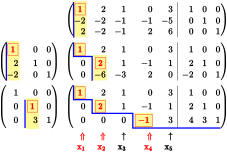

In [3]:
pr("Gaussian Elimination for [A | I ]",sz=12)
A = [ 1 2 1 0 3; -2 -2 -1 -1 -5; 2 -2 -1 2 6]; M,N = size(A)
pb = ShowGe{Rational{Int}}( A,  Matrix( 1I, M, M), tmp_dir="../tmp")

ref!(pb)
show_layout!(pb)

In [10]:
L = inv(pb.matrices[2][1])*inv(pb.matrices[3][1])
U = pb.matrices[end][end][:,1:N]
latexify([latex("A = L U = "), L', U']')

L"\begin{equation}
\left[
\begin{array}{ccc}
A = L U =  & \left[
\begin{array}{cccc}
1 & 0 & 0 & 0 \\
-1 & 1 & 0 & 0 \\
-2 & -3 & 1 & 0 \\
-3 & -4 & 0 & 1 \\
\end{array}
\right] & \left[
\begin{array}{ccccc}
1 & 2 & 1 & 0 & 3 \\
0 & 2 & 1 & -1 & 1 \\
0 & 0 & 3 & -1 & 3 \\
0 & 0 & 0 & 2 & 1 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

We have kept track of the product of the elementary GE matrices applied with a simple expedient:
just augment the $A$ matrix by $I$!

If we now get a right hand side $b = (10 \; 5 \; 11)^t$ for example, we can solve our $A x = b$ system
by computing $y = E_2 E_1 b$

$\qquad
y = \begin{pmatrix} 1&0&0 \\ 2&1&0 \\ 4&3&1 \end{pmatrix} \begin{pmatrix}10 \\ 5 \\ 11 \end{pmatrix} = \begin{pmatrix}10 \\ 25 \\ 66 \end{pmatrix}
$

followed by the usual backsubstitution problem $U x =y$:

$\qquad
\left(\begin{array}{rrrrr}
 1&  2&  1&   0&  3\\
 0&  2&  1&  -1&  1\\
 0&  0&  0&  -1&  3
\end{array}\right)   x  = \begin{pmatrix}10 \\ 25 \\ 66 \end{pmatrix}
$

---
Note that we need to multiply out the $E_i$ matrices to do this. Can we do better?

Look again at our equation

$\qquad y = E_2 E_1 b \Leftrightarrow E_1^{-1} E_2^{-1} y = b$

The inverses of the $E_i$ matrices are trivial: just change the signs of the off-diagonal terms.<br>
> It turns out that the product is trivial to: think of superposing the matrices and keeping the non-zero entries:<br>
> the $i^{th}$ column of the product is the $i^{th}$ column pf $E_i$

$\qquad E_1^{-1} E_2^{-1} = \left(\begin{array}{rrr} 1 & 0 & 0\\ -2 & 1 & 0\\ 2 &  0 & 1 \end{array}\right)
                       \left(\begin{array}{rrr} 1 & 0 & 0\\  0 & 1 & 0\\ 0 & -3 & 1 \end{array}\right)
                     = \left(\begin{array}{rrr} 1 & 0 & 0\\ -2 & 1 & 0\\ 2 & -3 & 1 \end{array}\right) = L
$

> The result is a **unit lower triangular matrix** which we will call $L$: we need to solve $L y = b$.

If we transcribe this matrix equation, we see that it is trivial: the equations are

$\qquad
\begin{align}
y_1 =& 10\\
y_2 =& 5 + 2 y_1\\
y_3 =& 11 -2 y_1 + 3 y_2
\end{align}
$

**The equations are trivially solvable from the top down by forward substitution!**

---
It turns out this pattern always holds provided that
* we use GE, not GJ
* we do not scale any row while running a GE computation (that is a *choice*)
* we do not interchange any rows while running a GE computation (might be unavoidable)

> In summary: given these two conditions hold, we have found a unit lower triangular matrix $L$ and a row form matrix $U$<br>
such that
>
>  $\qquad A = L U,$
>
>  which we use to solve
>
> $\qquad A x = b \Leftrightarrow L (U x) = b \Leftrightarrow \quad \begin{cases} L y = b\\ U x = y \end{cases}$

### 1.2 $\ $ An example with a larger matrix

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:15pt;\">Add a right hand side to check y</p>\n</div>")

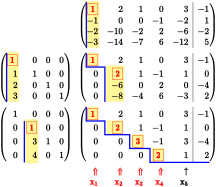

In [12]:
A = [ 1    2   1   0    3;
     -1    0   0  -1   -2;
     -2  -10  -2   2   -6;
     -3  -14  -7   6  -12 ]

pr("Add a right hand side to check y",sz=15)
b        = [-1;1;-2;5]
pb = ShowGe{Rational{Int}}( A,  b, tmp_dir="../tmp")

ref!(pb)
show_layout!(pb)

In [15]:
pr("The L matrix is made up from the inverses of the "*L"E_i",sz=15)
pr("don't forget the sign change!", sz=12, color="red")

println("Using the first column from E₁ and the 2nd column form E₂, we see")
L = inv(pb.matrices[2][1])*inv(pb.matrices[3][1])
U = pb.matrices[end][end][:,1:N]
latexify([latex("A = L U = "), L', U']')

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:15pt;\">The L matrix is made up from the inverses of the \$E_i\$</p>\n</div>")

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:red;font-size:12pt;\">don't forget the sign change!</p>\n</div>")

Using the first column from E₁ and the 2nd column form E₂, we see


L"\begin{equation}
\left[
\begin{array}{ccc}
A = L U =  & \left[
\begin{array}{cccc}
1 & 0 & 0 & 0 \\
-1 & 1 & 0 & 0 \\
-2 & -3 & 1 & 0 \\
-3 & -4 & 0 & 1 \\
\end{array}
\right] & \left[
\begin{array}{ccccc}
1 & 2 & 1 & 0 & 3 \\
0 & 2 & 1 & -1 & 1 \\
0 & 0 & 3 & -1 & 3 \\
0 & 0 & 0 & 2 & 1 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

In [16]:
pr( "solving for y", sz=15)
y = L \ b
println("Use forward-substitution to solve L y = b for y= $y"); println()
println("Compare the right hand side we got in the first (now unnecessary computation)")
println("\nFinish the computation using backsubstitution for the row echelon form problem U x = y")

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:15pt;\">solving for y</p>\n</div>")

Use forward-substitution to solve L y = b for y= Rational{Int64}[-1, 0, -4, 2]

Compare the right hand side we got in the first (now unnecessary computation)

Finish the computation using backsubstitution for the row echelon form problem U x = y


In [18]:
#check
@show A == L*U;

A == L * U = true


# 2. PLU decomposition

This leaves a question: what if we have to do row exchanges?

It turns out to be a simple extension of the previous result.
Let's look at the following example:

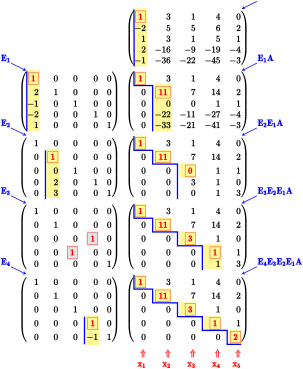

In [21]:
A  = [ 1    3    1    4   0;
      -2    5    5    6   2;
       1    3    1    5   1;
       2  -16   -9  -19  -4;
      -1  -36  -22  -45  -3 ]

pb = ShowGe{Rational{Int}}( A, tmp_dir="../tmp")

ref!(pb)
show_layout!(pb, array_names=["E", ["A"]])

If we solve $E_3 E_2 E_1 A = U \Leftrightarrow  A = E_1^{-1} E_2^{-1} E_3^{-1} E_4^{-1} U$ and look at the product of the inverse matrices,
we see that the pattern no longer holds!

In [22]:
pr("The inverse matrix is no longer unit lower triangular!")
E = pb.matrices[5][1]*pb.matrices[4][1]*pb.matrices[3][1]*pb.matrices[2][1]
latexify([latex("(E_4 E_3 E_2 E_1 )^{-1} = "), inv(E)']')

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:15pt;\">The inverse matrix is no longer unit lower triangular!</p>\n</div>")

L"\begin{equation}
\left[
\begin{array}{cc}
(E_4 E_3 E_2 E_1 )^{-1} =  & \left[
\begin{array}{ccccc}
1 & 0 & 0 & 0 & 0 \\
-2 & 1 & 0 & 0 & 0 \\
1 & 0 & 0 & 1 & 0 \\
2 & -2 & 1 & 0 & 0 \\
-1 & -3 & 0 & 1 & 1 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

If we investigate, we see that the problem arises with the row exchange matrix $E_3$:<br>
Let's leave it out of the multiplication, and look at $(E_1^{-1} E_2^{-1}) E_3^{-1} E_4^{-1}$:

We find

$\qquad \begin{pmatrix} 1&0&0&0&0 \\
 -2 &1  &0 &0 &0 \\
  1 & 0 &1 &0 &0 \\
  2 &-2 &0 &1 &0 \\
 -1 &-3 &0 &0 &1 \end{pmatrix} E_3^{-1}
\begin{pmatrix}1& 0& 0&  0&  0 \\
 0 & 1 & 0 & 0 & 0 \\
 0 & 0 & 1 & 0 & 0 \\
 0 & 0 & 0 & 1 & 0 \\
 0 & 0 & 0 & 1 & 1\end{pmatrix}
$

The product of the first and third matrix would be unit lower triangular as before.

A moment's thought leads to the realization that permuting the rows of $A$ appropriately should result in a matrix that does not require
a row exchange.<br>Could we somehow pull the second matrix to the left?

Since $E_3^{-1}$ is a permutation matrix, let's change notation and call it $P = E_3^{-1}$.
Denote the matrix to it's left $\mathscr{E} = E_1^{-1} E_2^{-1}$.<br>
The question we are asking is
whether we could interchange $\mathscr{E} P$.

---
$\mathscr{E} P = P \mathscr{\tilde{E}} \Leftrightarrow \mathscr{\tilde{E}} = P^{-1} \mathscr{E} P$

Let's see:

$\qquad
P^{-1} \mathscr{E} = \left(\begin{array}{rrrrr}
  1 &  0 & 0 & 0 & 0\\
 -2 &  1 & 0 & 0 & 0\\
  2 & -2 & 0 & 1 & 0\\
  1 &  0 & 1 & 0 & 0\\
 -1 & -3 & 0 & 0 & 1 \end{array}\right)
$

so $P$ does indeed interchange the corresponding rows, but in the process, it displaces the 1 entries on the diagonal!<br>
Multiplying this matrix with $P$ from the right fixes up the 1 entries:

$\qquad
P^{-1} \mathscr{E} P = \left(\begin{array}{rrrrr}
  1 &  0 & 0 & 0 & 0\\
 -2 &  1 & 0 & 0 & 0\\
  2 & -2 & 1 & 0 & 0\\
  1 &  0 & 0 & 1 & 0\\
 -1 & -3 & 0 & 0 & 1 \end{array}\right)
$

The end result: pulling the row exchange matrix to the left exchanges the row entries below the diagonal.<br>
This is the right form so that the product of the elimination matrices are unit lower triangular as before.

> We have achieved the decomposition $A = P L U$.

In the class notes, we verify that the required patterns in the matrix multiplications hold in general.

> Using the PLU decomposition to solve $A x = b \Leftrightarrow P L U x = b \Leftrightarrow \begin{align} P w = b \\ L y = w \\ U x = y \end{align}$
> * $P w = b$ is just a row exchange of the entries in $b$.
> * $L y = w$ is solved by forward substitution. Its solution yields the right hand side of the echelon form $A x = b \Leftrightarrow U x = y$
> * $U x = y& is solved by back substitution as before

In [31]:
pr( "Solve A x = b using A = PLU", sz=12)
println("Use GE to find A = P L U")
P           = inv(pb.matrices[4][1])
Pinv_Einv_P = inv(P)*inv(pb.matrices[2][1])*inv(pb.matrices[3][1])*P
L           = Pinv_Einv_P * inv(pb.matrices[5][1])
U           = pb.matrices[end][end]

display(latexify( [latex("A = P L U = "), P', L', U']'))
@show A == P*L*U;

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:12pt;\">Solve A x = b using A = PLU</p>\n</div>")

Use GE to find A = P L U


"\\begin{equation}\n\\left[\n\\begin{array}{cccc}\nA = P L U =  & \\left[\n\\begin{array}{ccccc}\n1 & 0 & 0 & 0 & 0 \\\\\n0 & 1 & 0 & 0 & 0 \\\\\n0 & 0 & 0 & 1 & 0 \\\\\n0 & 0 & 1 & 0 & 0 \\\\\n0 & 0 & 0 & 0 & 1 \\\\\n\\end{array}\n\\right] & \\left[\n\\begin{array}{ccccc}\n1 & 0 & 0 & 0 & 0 \\\\\n-2 & 1 &" ⋯ 24 bytes ⋯ " & 0 & 0 \\\\\n1 & 0 & 0 & 1 & 0 \\\\\n-1 & -3 & 0 & 1 & 1 \\\\\n\\end{array}\n\\right] & \\left[\n\\begin{array}{ccccc}\n1 & 3 & 1 & 4 & 0 \\\\\n0 & 11 & 7 & 14 & 2 \\\\\n0 & 0 & 3 & 1 & 0 \\\\\n0 & 0 & 0 & 1 & 1 \\\\\n0 & 0 & 0 & 0 & 2 \\\\\n\\end{array}\n\\right] \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

A == P * L * U = true


In [36]:
# Example using PLU wit a new right hand side:
b =[ 12; 10; 13; -38; -117]
w = P \ b   # solve P w = b
y = L \ w   # solve L y = w
x = U \ y   # solve U x = y

println( "Given a right hand side   b = $(b')ᵗ")
println( "solve     P w = b:        w = $(Int64.(w))ᵗ")
println( "Fwd Subst L y = w:        y = $(Int64.(y))ᵗ")
println( "Bwd Subst U x = y:        x = $(Int64.(x))ᵗ")

@show A * x == b;

Given a right hand side   b = [12 10 13 -38 -117]ᵗ
solve     P w = b:        w = [12, 10, -38, 13, -117]ᵗ
Fwd Subst L y = w:        y = [12, 34, 6, 1, -4]ᵗ
Bwd Subst U x = y:        x = [2, -1, 1, 3, -2]ᵗ
A * x == b = true
